# Plotting Pandapower Networks Without Geographical Information

If a network does not have geographic coordinates, you can create generic coordinates for plotting with the create_generic_coordinates function.

###### You need to install the python-igraph package for this functionality: http://igraph.org/python/

In [1]:
import pandapower as pp
import pandapower.networks as nw
import pandapower.plotting as plot
%matplotlib inline
try:
    import seaborn
    colors = seaborn.color_palette()
except:
    colors = ["b", "g", "r", "c", "y"]

hp.pandapower.plotting.plotly.traces - INFO: Failed to import plotly - interactive plotting will not be available


We delete the geocoordinates from the network and create generic ones:

In [2]:
net = nw.mv_oberrhein()
net.bus_geodata.drop(net.bus_geodata.index, inplace=True)
net.line_geodata.drop(net.line_geodata.index, inplace=True)
plot.create_generic_coordinates(net, respect_switches=False) #create artificial coordinates with the igraph package

This pandapower network includes the following parameter tables:
   - bus (179 elements)
   - load (147 elements)
   - sgen (153 elements)
   - switch (322 elements)
   - ext_grid (2 elements)
   - line (181 elements)
   - trafo (2 elements)
   - bus_geodata (179 elements)
 and the following results tables:
   - res_bus (179 elements)
   - res_line (181 elements)
   - res_trafo (2 elements)
   - res_ext_grid (2 elements)
   - res_load (147 elements)
   - res_sgen (153 elements)

As you can see the table bus_geodata has been created and we can now plot as before. Since the function only creates bus geodata, we can only use the direct line plotting. Furthermore it creates a distance between high- and low voltage bus of a transformer, which is why we also need a transformer collection:

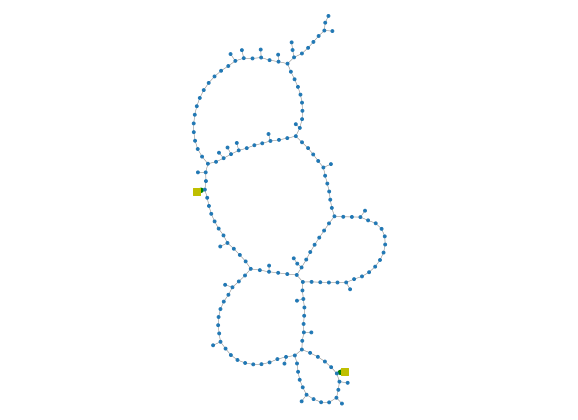

In [3]:
bc = plot.create_bus_collection(net, net.bus.index, size=.2, color=colors[0], zorder=10)
tlc, tpc = plot.create_trafo_collection(net, net.trafo.index, color="g")
lcd = plot.create_line_collection(net, net.line.index, color="grey", linewidths=0.5, use_bus_geodata=True)
sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=.5, color="y", zorder=11)
plot.draw_collections([lcd, bc, tlc, tpc, sc], figsize=(8,6))

The create_generic_coordinates function treats transformers as edges, which means the HV and LV side of the transformer are shown by seperate buses with a trafo symbol as connection (consisting of a line collection for the connections and a patch collection for the circles).

If you do not want to plot the transformers you can use the fuse_geodata function. It fuses the geocoordinates of all buses that are geographically in one place (HV/LV bus of a transformer or buses and buses that are connected by a bus-bus switch):

hp.pandapower.plotting.collections - WARNING: None in collections is of unknown type. Skipping
hp.pandapower.plotting.collections - WARNING: None in collections is of unknown type. Skipping


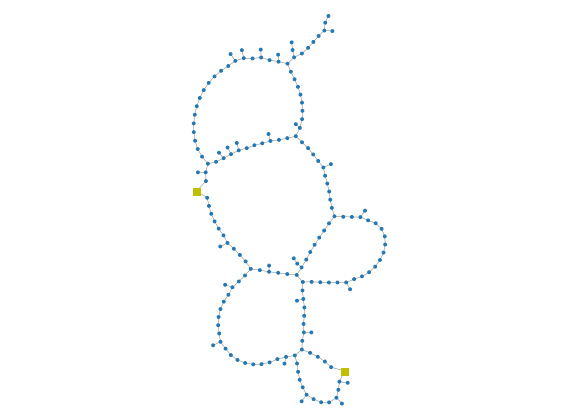

In [4]:
plot.fuse_geodata(net)
bc = plot.create_bus_collection(net, net.bus.index, size=.2, color=colors[0], zorder=10)
tlc, tpc = plot.create_trafo_collection(net, net.trafo.index, color="g")
lcd = plot.create_line_collection(net, net.line.index, color="grey", linewidths=0.5, use_bus_geodata=True)
sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=.5, color="y", zorder=11)
plot.draw_collections([lcd, bc, tlc, tpc, sc], figsize=(8,6))

## Plot Structural Plans

To plot a structural plan of the network instead of a geographical one, call the generic coordinates function with respect_switches=True.

In [5]:
net = nw.mv_oberrhein()
net.bus_geodata.drop(net.bus_geodata.index, inplace=True)
net.line_geodata.drop(net.line_geodata.index, inplace=True)
plot.create_generic_coordinates(net, respect_switches=True) #create artificial coordinates with the igraph package

This pandapower network includes the following parameter tables:
   - bus (179 elements)
   - load (147 elements)
   - sgen (153 elements)
   - switch (322 elements)
   - ext_grid (2 elements)
   - line (181 elements)
   - trafo (2 elements)
   - bus_geodata (179 elements)
 and the following results tables:
   - res_bus (179 elements)
   - res_line (181 elements)
   - res_trafo (2 elements)
   - res_ext_grid (2 elements)
   - res_load (147 elements)
   - res_sgen (153 elements)

In that way, the algorithm seperates buses which are seperated by an open switch:

hp.pandapower.plotting.collections - WARNING: None in collections is of unknown type. Skipping
hp.pandapower.plotting.collections - WARNING: None in collections is of unknown type. Skipping


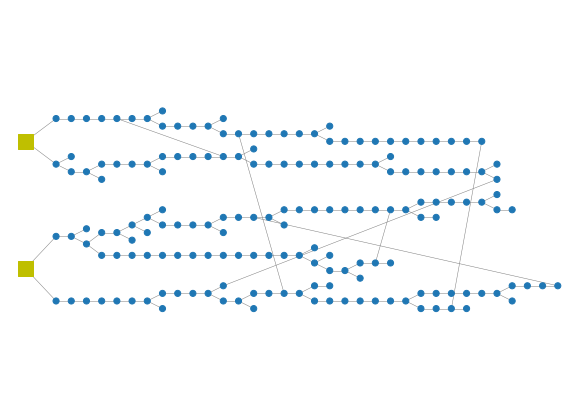

In [6]:
plot.fuse_geodata(net)
bc = plot.create_bus_collection(net, net.bus.index, size=.2, color=colors[0], zorder=10)
tlc, tpc = plot.create_trafo_collection(net, net.trafo.index, color="g")
lcd = plot.create_line_collection(net, net.line.index, color="grey", linewidths=0.5, use_bus_geodata=True)
sc = plot.create_bus_collection(net, net.ext_grid.bus.values, patch_type="rect", size=.5, color="y", zorder=11)
plot.draw_collections([lcd, bc, tlc, tpc, sc], figsize=(8,6))

For a clearer arrangement, it might be useful to only plot the lines without an open switch:

hp.pandapower.plotting.collections - WARNING: None in collections is of unknown type. Skipping
hp.pandapower.plotting.collections - WARNING: None in collections is of unknown type. Skipping


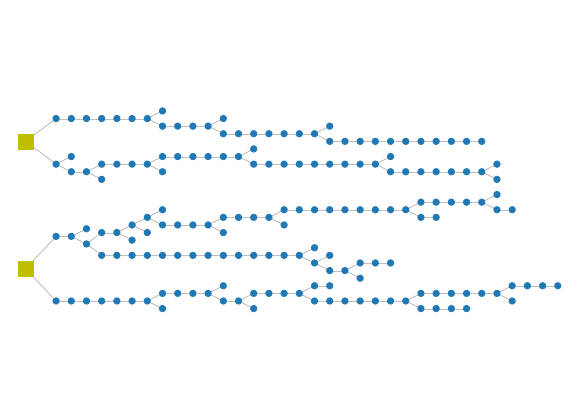

In [7]:
closed_lines = set(net.line.index) - set(net.switch[(net.switch.et=="l") & (net.switch.closed==False)].element.values)
lcd = plot.create_line_collection(net, closed_lines, color="grey", linewidths=0.5, use_bus_geodata=True)
plot.draw_collections([lcd, bc, tlc, tpc, sc], figsize=(8,6))